In [66]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from faker import Faker
from datetime import datetime, timedelta

pd.set_option("display.max_colwidth", 5000)

In [2]:
df_dic_influd21 = pd.read_excel("dicionario_sindrome_respiratoria.xlsx")
dic_columns_raw = pd.Series( list( df_dic_influd21.DBF ) ).dropna().to_numpy()

# Organiza os nomes das colunas separando em novos nomes aqueles campos separados por " OU "
dic_columns = []
for col in dic_columns_raw:
    col = col.upper()
    if(" OU " in col):
        col = col.split(" OU ")
        dic_columns.append(col[0])
        dic_columns.append(col[1])
    else: 
        dic_columns.append(col.replace(" OU", ""))
dic_columns = np.array(dic_columns)

In [3]:
df_influd21 = pd.read_csv("../../INFLUD21-09-06-2022.csv", on_bad_lines='skip', sep = ";")
df_influd21.head(2)

/tmp/ipykernel_32740/3883492426.py:1: DtypeWarning: Columns (15,59,61,62,63,91,93,105,107,114,116,117,118,120,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_influd21 = pd.read_csv("../../INFLUD21-09-06-2022.csv", on_bad_lines='skip', sep = ";")


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,DOSE_2_COV,DOSE_REF,FAB_COV_1,FAB_COV_2,FAB_COVREF,LOTE_REF,LAB_PR_COV,LOTE_1_COV,LOTE_2_COV,FNT_IN_COV
0,05/01/2021,1,04/01/2021,1,AL,1 MICRORREGIAO DE SAUDE,1533.0,MACEIO,270430,HOSPITAL DA MULHER DRA NISE DA SILVEIRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,06/01/2021,1,03/01/2021,1,MS,EX ARS DE CAMPO GRANDE,1975.0,CAMPO GRANDE,500270,PRONCOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
def search_field(df, field, return_index = False):
    '''
    Encontra colunas que contém em parte o texto presente em field
    '''
    
    if(not return_index):
        return df.loc[:,np.array([field in column for column in df.columns])]
    return np.array([field in column for column in df.columns])

In [5]:
np.mean(pd.Series(list(search_field(df_influd21, "CS_ESCOL_N").iloc[:,0])).isna())

0.35355039767623586

In [6]:
# verifica quais colunas da base fornecida de fato pertencem ao dicionário dos dados oferecido
df_columns_in_dic = np.array([col in dic_columns for col in df_influd21.columns])
dic_in_df_columns = np.array([col in df_influd21.columns for col in dic_columns])

In [7]:
# Tem na base e não tem no dicionário. Estranho...
tem_base_nao_tem_dic = df_influd21.columns[~df_columns_in_dic]

# Tem no dicionário e não tem na base. Provavelmente confidenciais...
tem_dic_nao_tem_base = dic_columns[~dic_in_df_columns] 

In [8]:
# Colunas (com descrição) dos campos presentes no dicionário da base de dados que não estão presentes na base atual obtida
# no portal do SUS para Síndrome Respiratória Aguda
df_dic_influd21.loc[df_dic_influd21.DBF.isin(tem_dic_nao_tem_base),["DBF","Descrição","Características"]]

,DBF,Descrição,Características
0,NU_NOTIFIC,Número do registro,"Campo Interno\nNúmero sequencial gerado automaticamente pelo sistema. Utilizar o padrão:\n320120000123\nDígito 1: caracteriza o tipo da ficha (1=SG, 2=SRAG-UTI e 3-SRAG Hospitalizado).\nDígitos 2 a 12: número sequencial gerado automaticamente pelo sistema."
11,TEM_CPF,Informar se o paciente notificado dispõe de Número do Cadastro de Pessoa Física (CPF),"Campo Obrigatório\nSe selecionado “Sim”, preencher campo “CPF”. Se selecionado “Não” preencher CNS. Se o paciente não dispor de CPF é obrigatório o preenchimento do CNS. No caso de pacientes raça/cor indígenas, somente o CNS é considerado como campo obrigatório."
12,NU_CPF,Número do Cadastro de Pessoa Física (CPF) do paciente notificado,"Campo Obrigatório\nQuando preenchido o número do CPF o sistema deverá preencher o Nome, Sexo, Data de Nascimento, Idade, Raça/Cor e o nome da mãe do paciente."
14,NU_CNS,Preencher com o número do Cartão Nacional de Saúde do paciente,Campo Obrigatório
15,NM_PACIENT,Nome completo do,Campo Obrigatório
24,CS_ETINIA,"Nome e código da etnia do paciente, quando indígena.",Campo Essencial\nHabilitado se campo\n11-Raça/Cor for igual a 5-Indígena.
25,POV_CT,Informar se o paciente for membro de algum povo ou comunidade tradicional,Campo Obrigatório
26,TP_POV_CT,Informar o povo ou comunidade tradicional,Campo Obrigatório- Habilitado se campo\n13- É membro de povo ou comunidade tradicional? for igual a 1- Sim
30,NM_MAE_PAC,Nome completo da mãe do paciente (sem abreviações).,Campo Essencial
31,NU_CEP,CEP de residência do paciente.,Campo Essencial\nValidado a partir da tabela de CEP dos Correios.


Veja que esses campos provavelmente foram deletados de modo a remover informações confidenciais dos pacientes do Sistema Único de Saúde. Como temos o interesse em desenvolver uma plataforma que usa esses dados confidenciais para fazer o link de bases de dados, a partir deste momento trabalharemos com uma base de dados mockada para o desenvolvimento do modelo de ligação entre indivíduos.

A priori utilizarmos os campos

### Variáveis relacionadas a informações pessoais do paciente
* TEM_CPF: Se o paciente tem ou não CPF (1: Sim, 2: Não);
* NU_CPF: Caso o paciente tenha CPF, seu número do CPF;
* NU_CNS: Número do Cartão Nacional de Sáude;
* NM_PACIENT: Nome completo do paciente;
* NM_MAE_PAC: Nome completo da mãe do paciente;
* DT_NASC: Data de nascimento do paciente;
* CS_SEXO: Sexo do paciente;
* CS_RACA: Raça do paciente;

### Variáveis relacionadas ao endereço do paciente
* SG_UF_NOT: Estado (Unidade Federativa) do paciente;
* ID_MUNICIP: Município atual do paciente;
* NM_LOGRADO: Logradouro (rua, avenida, quadra, ...)
* NU_NUMERO: Número do logradouro (casa ou edifício);
* NM_BAIRRO: Bairro de residência do paciente;
* NM_COMPLEM: Complemento do logradouro (casa, apto, bloco, ...);

Esses campos foram baseados na observação das colunas faltantes da tabela e na checagem de campos presentes no formulário de notificação do ESUS para casos suspeitos de Covid. O treinamento do modelo será baseado na linkagem da base de casos suspeitos do ESUS notifica com a base do SRAG 2021. Os links para ambos os formulários são dados a seguir:

Formulário ESUS notifica: https://sinepe-pe.org.br/wp-content/uploads/2020/10/ficha_e_sus.pdf

Formulário SRAG: https://www.saude.go.gov.br/files/vigilancia/epidemiologica/fichas-de-notificacao/SindromeRespiratoriaAgudaGrave-SIVEPGRIPE.pdf.pdf

Base de dados de SRAG: https://opendatasus.saude.gov.br/dataset/srag-2021-e-2022/resource/dd91a114-47a6-4f21-bcd5-86737d4fc734#

É interessante destacarmos que, embora a base de dados de SRAG 2021 tenha muito mais informações sobre os pacientes, existe um gargalo das informações que podem ser utilizadas na classificação dos pacientes, já que para a efetuação do linkage é necessário que ambas as bases compartilhem os campos usados para a comparação.

### Análise de valores reais

Nessa seção vejamos o conteúdo das colunas selecionadas para comparação que, por ventura, também estejam presentes na base de dados de SRAG 2021.

In [9]:
# Variáveis usadas para o linkage das bases
link_vars = ["TEM_CPF","NU_CPF","NU_CNS","NM_PACIENT","NM_MAE_PAC",
             "DT_NASC","CS_SEXO","CS_ETINIA","NU_CEP","SG_UF_NOT",
             "ID_MUNICIP","NM_LOGRADO","NU_NUMERO","NM_BAIRRO","NM_COMPLEM"]

print("Número de variáveis para o link das bases de dados:", len(link_vars))

valid_link_vars = []
for link_var in link_vars:
    if(link_var in df_influd21.columns):
        valid_link_vars.append( link_var )
df = df_influd21.loc[:,valid_link_vars]

print("Dimensão da tabela com os dados presentes:", df.shape)
df.head(2)

Número de variáveis para o link das bases de dados: 15
Dimensão da tabela com os dados presentes: (1728919, 4)


,DT_NASC,CS_SEXO,SG_UF_NOT,ID_MUNICIP
0,05/10/2016,M,AL,MACEIO
1,20/01/1971,F,MS,CAMPO GRANDE


Embora temos apenas 4 desses campos presentes na base de dados, podemos verificar valores como o número de observações presentes na base e a proporção de observações faltantes (para termos uma noção do ruído acrescentado na base de treinamento do modelo)

Temos observações faltantes apenas na coluna DT_NASC

In [10]:
print("Número de observações com data faltante:", len(np.where(df.DT_NASC.isna())[0]))
print("Proporção total: ", np.round(len(np.where(df.DT_NASC.isna())[0]) / df.shape[0] * 100, 4), "%", sep="")

Número de observações com data faltante: 1188
Proporção total: 0.0687%


### Mock database

Na seção seguinte faremos a geração de valores _dummy_ (_fake_) para as informações confidenciais a serem linkadas. 

In [11]:
from mock_data import *

In [153]:
def create_patient_database(n_patients = 1000, prob_CPF = 0.8, prob_CNS = 0.6):
    columns = ['TEM_CPF', 'NU_CPF', 'TEM_CNS', 'NU_CNS', 'NM_PACIENT',
               'NM_MAE_PAC', 'DT_NASC', 'CS_SEXO', 'CS_RACA', 'SG_UF_NOT',
               'ID_MUNICIP', 'NM_LOGRADO', 'NU_NUMERO', 'NM_BAIRRO', 'NM_COMPLEM']
    rows = []
    for i in range(n_patients):
        patient = create_patient(prob_CPF = prob_CPF, prob_CNS = prob_CNS)
        rows.append(list(patient.values()))
    df = pd.DataFrame(rows)
    df.columns = columns
    df.DT_NASC = pd.to_datetime(df.DT_NASC, format="%Y-%m-%d")
    return df

In [154]:
# Probabilidades de CPF e CNS definidas como zero para o treinamento do modelo
# Já que o modelo será aplicado apenas quando esses campos são faltantes nos dados
df = create_patient_database(n_patients = 10, prob_CPF = 0, prob_CNS = 0)
df.shape

(10, 15)

### Criação da segunda base linkada com essa

A função a seguir pega uma amostra da primeira base para compor a segunda e também gera um número de novas observações presentes na segunda base que não estarão presentes na primeira

* prop_d1_in_d2: Proporção de indivíduos da base 1 presentes na base 2
* prop_d2_not_in_d1: Proporção de indivíduos da base 2 não presentes na base 1

In [155]:
def create_linked_database(df, prop_d1_in_d2, prop_d2_not_in_d1):
    # Índice dos indivíduos da primeira base
    df = df.copy()
    indice = np.arange(df.shape[0])
    # df.insert(0, "Índice", indice)
    
    indices_d1_in_d2 = np.random.choice(indice, int(len(indice)*prop_d1_in_d2), replace = False )

    # Transfere indivíduos da base 1 para a base 2
    df2 = pd.DataFrame(df.iloc[indices_d1_in_d2,:])
    
    # Cria novos indivíduos para a base 2
    df2_new = create_patient_database(n_patients = int(len(indice)*prop_d2_not_in_d1), prob_CPF = 0, prob_CNS = 0)
    
    df2 = pd.concat([df2, df2_new])
    
    return df2

In [156]:
df.insert(0, "Índice", np.arange(df.shape[0]))
df2 = create_linked_database(df, 0.7, 0.5)
df2.head(2)

,Índice,TEM_CPF,NU_CPF,TEM_CNS,NU_CNS,NM_PACIENT,NM_MAE_PAC,DT_NASC,CS_SEXO,CS_RACA,SG_UF_NOT,ID_MUNICIP,NM_LOGRADO,NU_NUMERO,NM_BAIRRO,NM_COMPLEM
7,7.0,False,None,False,None,Jose Cunha,Rita Cunha,2014-10-25,1,1,BA,Itororó,Setor Azevedo,52,Atila De Paiva,
6,6.0,False,None,False,None,Eduardo Seabra,Marilene Seabra,1965-04-08,9,1,MG,Entre Rios de Minas,Condomínio Nina Moura,84,Vila Tirol,APT 93


In [157]:
df.columns = df.columns + ("1")
df2.columns = df2.columns + ("2")

Para parearmos todos os indivíduos fazemos um loop pareado

In [244]:
df = create_patient_database(n_patients = 250, prob_CPF = 0, prob_CNS = 0)
df.insert(0, "Índice", np.arange(df.shape[0]))
df2 = create_linked_database(df, 0.8, 0.4)
df.columns = df.columns + ("1")
df2.columns = df2.columns + ("2")
df2.reset_index(inplace = True)
df2.drop(columns="index", inplace = True)

df_paired = pd.DataFrame()
rows = []
for i in range(df.shape[0]):
    for j in range(df2.shape[0]):
        paired = np.concatenate([list(df.iloc[i,:]),
                                 list(df2.iloc[j,:]),
                                 [1 if(df.iloc[i,0] == df2.iloc[j,0]) else 0]])
        rows.append(paired)
df_paired = pd.DataFrame(rows)
df_paired.columns = np.concatenate([df.columns, df2.columns, ["same"]])
df_paired.drop(columns = ["TEM_CPF1","NU_CPF1","TEM_CNS1","NU_CNS1",
                          "TEM_CPF2","NU_CPF2","TEM_CNS2","NU_CNS2",
                          "Índice1","Índice2"], inplace = True)
df_paired.head(4)

,NM_PACIENT1,NM_MAE_PAC1,DT_NASC1,CS_SEXO1,CS_RACA1,SG_UF_NOT1,ID_MUNICIP1,NM_LOGRADO1,NU_NUMERO1,NM_BAIRRO1,...,DT_NASC2,CS_SEXO2,CS_RACA2,SG_UF_NOT2,ID_MUNICIP2,NM_LOGRADO2,NU_NUMERO2,NM_BAIRRO2,NM_COMPLEM2,same
0,Adilson Nobre,Raimunda Nobre,1941-12-19,1,4,PI,Regeneração,Viela Camila Freitas,367,Nossa Senhora Aparecida,...,1936-10-05,9,4,MG,Tapira,Travessa de Farias,5,Jardim Leblon,APT 100,0
1,Adilson Nobre,Raimunda Nobre,1941-12-19,1,4,PI,Regeneração,Viela Camila Freitas,367,Nossa Senhora Aparecida,...,1933-01-23,2,3,MA,Axixá,Residencial de Lima,523,Novo São Lucas,,0
2,Adilson Nobre,Raimunda Nobre,1941-12-19,1,4,PI,Regeneração,Viela Camila Freitas,367,Nossa Senhora Aparecida,...,1952-10-21,9,4,MG,Coronel Pacheco,Vila de Lopes,61,Vila Fumec,casa verde,0
3,Adilson Nobre,Raimunda Nobre,1941-12-19,1,4,PI,Regeneração,Viela Camila Freitas,367,Nossa Senhora Aparecida,...,2015-03-02,1,4,MT,Cuiabá,Trecho de Nascimento,73,Vila Rica,,0


In [246]:
df_paired.loc[df_paired.same == 1, ["NM_PACIENT1","NM_PACIENT2"]]

,NM_PACIENT1,NM_PACIENT2
61,Adilson Nobre,Adilson Nobre
414,João Catarino,João Catarino
740,Joana de Fatima da Silva Bernardo de Fatima Ferreira,Joana de Fatima da Silva Bernardo de Fatima Ferreira
1075,Maria Amorim,Maria Amorim
1295,Luiz Reboucas,Luiz Reboucas
...,...,...
73529,Maria de Sales,Maria de Sales
73836,Maria de Brito,Maria de Brito
74277,Maria de Matos,Maria de Matos
74467,Maria da Penha Novais,Maria da Penha Novais


# Modelo de Classificação

### Construção da base de dados de métricas

In [247]:
from Levenshtein import distance as lev

In [248]:
def get_metrics(df_paired):
    '''
        Atribui uma métrica de distância principalmente às medidas de string e datas,
        de modo a tratar numericamente os dados de nomes.
        Valores categóricos com poucas classes, como sexo, raça são mantidos
        como variáveis categóricas a serem aprendidas pelo modelo de classificação.
    '''
    rows = []
    for j in range(df_paired.shape[0]):
        # NM_PACIENT
        NM_PACIENT = lev(df_paired.NM_PACIENT1[j], df_paired.NM_PACIENT2[j])
        # NM_MAE_PACIENT
        NM_MAE_PAC = lev(df_paired.NM_MAE_PAC1[j], df_paired.NM_MAE_PAC2[j])
        # DT_NASC (days)
        DT_NASC = np.abs(df_paired.DT_NASC1[j] - df_paired.DT_NASC2[j]).days
        # SEXO, RACA deixadas como variáveis categóricas. O modelo
        # atribuirá um peso para cada categoria
        # UF
        SG_UF_NOT = 0 if(df_paired.SG_UF_NOT1[j] == df_paired.SG_UF_NOT2[j]) else 1
        # MUNICIPIO
        ID_MUNICIP = lev(df_paired.ID_MUNICIP1[j], df_paired.ID_MUNICIP2[j])
        # LOGRADO
        NM_LOGRADO = lev(df_paired.NM_LOGRADO1[j], df_paired.NM_LOGRADO2[j])
        # NUMERO
        NU_NUMERO = lev(str(df_paired.NU_NUMERO1[j]), str(df_paired.NU_NUMERO2[j]))
        # BAIRRO
        NM_BAIRRO = lev(df_paired.NM_BAIRRO1[j], df_paired.NM_BAIRRO2[j])
        # COMPLEM
        NM_COMPLEM = lev(df_paired.NM_COMPLEM1[j], df_paired.NM_COMPLEM2[j])
        rows.append( [NM_PACIENT, NM_MAE_PAC, DT_NASC, SG_UF_NOT, ID_MUNICIP,
                      NM_LOGRADO, NU_NUMERO, NM_BAIRRO, NM_COMPLEM,
                      df_paired.CS_SEXO1[j], df_paired.CS_SEXO2[j],
                      df_paired.CS_RACA1[j], df_paired.CS_RACA2[j]] )
    df_metrics = pd.DataFrame(rows)
    df_metrics.columns = ["Nome", "NomeMae", "DtNasc", "UF", "Municipio",
                          "Logradouro", "Numero", "Bairro", "Complemento",
                          "Sexo1", "Sexo2", "Raca1", "Raca2"]
    df_metrics.Sexo1 = df_metrics.Sexo1.astype(str)
    df_metrics.Sexo2 = df_metrics.Sexo2.astype(str)
    df_metrics.Raca1 = df_metrics.Raca1.astype(str)
    df_metrics.Raca2 = df_metrics.Raca2.astype(str)
    
    y = df_paired.same
    
    return df_metrics, y

In [249]:
X, y = get_metrics(df_paired)

In [250]:
X = pd.get_dummies(X)

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y)

sc = StandardScaler()
X_train.iloc[:,:9] = sc.fit_transform(X_train.iloc[:,:9])
X_test.iloc[:,:9] = sc.transform(X_test.iloc[:,:9])

In [253]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [254]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

In [255]:
from matplotlib import pyplot as plt

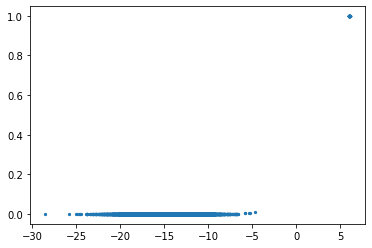

In [256]:
linear_fit = ( np.dot(X_test, lr.coef_.T).flatten() + lr.intercept_ )

plt.scatter(linear_fit, sigmoid(linear_fit), s = 5)
plt.show()

In [257]:
print("Acurácia do modelo:", balanced_accuracy_score(y_test, lr.predict(X_test)))

Acurácia do modelo: 1.0


Para a primeira aplicação temos uma acurácia de $100\%$. De fato esse resultado é esperado, uma vez que simplesmente construímos ambas as bases identicamente, sem o uso de um ruído, tornando a tarefa de classificação bem fácil para o modelo. Vejamos os resultados quando acrescentamos ruídos nos dados.

In [258]:
# Lê os dados dos municípios brasileiros
f = open("../../municipios_brasil.txt", "r")
municipios = []
UFs = []
for line in f.readlines():
    municipios.append( line.replace("\n","")[:-5] )
    UFs.append( line[-4:-2] )

def get_random_municipio():
    j = np.random.choice(np.arange(len(municipios)))
    return (municipios[j], UFs[j])

In [259]:
get_random_municipio()

('Simões Filho', 'BA')

In [260]:
chars = list("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ ")

def add_noise_str(_str, noise_rate):
    n = len(_str)
    noise_index = np.random.choice(np.arange(n), np.random.binomial(n, noise_rate), replace = False)
    
    _str = np.array(list(_str))
    _str[noise_index] = np.random.choice(chars, len(noise_index))
    _str = "".join(_str)
    
    return _str

In [270]:
# --- Carregamento e preparo para a geração do sobrenome... ---
surnames = pd.read_csv("../../MostCommonSurnames.csv", encoding = "latin1", header = None).iloc[:,1:]
surnames.columns = ["sobrenome", "frequencia", "proporcao"]

surnames_prop = []
for j in range(surnames.shape[0]):
    surnames_prop.append( 1/float(surnames.loc[j,"proporcao"].split(":")[1].replace(",",".")) )
surnames.proporcao = surnames_prop/np.sum(surnames_prop)

def add_noise(df, noise_rate = 0.2):
    '''
        Adiciona um ruído aos dados, que pode envolver a remoção do sobrenome, mudança de caracteres aleatória nas variáveis
        de texto, soma de datas e quantidades numéricas etc.
    '''
    # Remove o número na frente dos nomes das colunas
    
    colnames = df.columns
    df = df.copy()
    df.columns = df.columns.str[:-1]
    
    faker = Faker(["pt-BR"])
    
    prob_mudar_nome = noise_rate
    prob_mudar_nome_mae = noise_rate
    
    prob_mudar_municipio = noise_rate
    prob_ruido_aleatorio = noise_rate
    
    prob_mudar_sexo = noise_rate/10
    prob_mudar_raca = noise_rate/2
    
    prob_mudar_date = noise_rate
    
    prob_mudar_endereco = noise_rate
    # Percorre as observações da tabela uma a uma
    for i in range(df.shape[0]):
        
        if(np.random.random() < prob_mudar_nome):
            # print(df.loc[i, "NM_PACIENT"])
            complete_name = str(df.loc[i, "NM_PACIENT"]).split()
            name = complete_name[0]
            surname = " ".join(complete_name[1:])
            surname = Paciente.modify_surname(surnames.sobrenome, surnames.proporcao, surname)
            name = add_noise_str(name, noise_rate)
            df.loc[i, "NM_PACIENT"] = name +" "+ surname
        if(np.random.random() < prob_mudar_nome_mae):
            # print(df.loc[i, "NM_MAE_PAC"])
            complete_name = str(df.loc[i, "NM_MAE_PAC"]).split()
            name = complete_name[0]
            surname = " ".join(complete_name[1:])
            surname = Paciente.modify_surname(surnames.sobrenome, surnames.proporcao, surname)
            name = add_noise_str(name, noise_rate)
            df.loc[i, "NM_PACIENT"] = name +" "+ surname
        # noise_rate de chance do indivíduo mudar de municípipio
        if(np.random.random() < prob_mudar_municipio):
            municipio, UF = get_random_municipio()
            df.loc[i, "ID_MUNICIP"] = municipio
            df.loc[i, "SG_UF_NOT"] = UF
        # Adiciona ruídos aleatórios nos caracteres do município
        elif(np.random.random() < prob_mudar_municipio):
            df.loc[i,"ID_MUNICIP"] = add_noise_str(df.loc[i,"ID_MUNICIP"], noise_rate)
        if(np.random.random() < prob_mudar_sexo):
            df.loc[i,"CS_SEXO"] = np.random.choice([1, 2, 9])
        if(np.random.random() < prob_mudar_raca):
            df.loc[i,"CS_RACA"] = np.random.choice([1,2,3,4,5,9], p=[0.327,0.084,0.006,0.378,0.005,0.20])
        if(np.random.random() < prob_mudar_endereco):
            df.loc[i,"NM_LOGRADO"] = faker.street_name()
            df.loc[i,"NM_BAIRRO"] = faker.bairro()
            df.loc[i,"NU_NUMERO"] = faker.building_number()
            complemento = np.random.choice(["", "apt", "bloco", "casa"], p = [0.55, 0.3, 0.1, 0.05])
            if(complemento == "apt"):
                df.loc[i,"NM_COMPLEM"] = "APT "+ str(np.random.randint(130))
            elif(complemento == "bloco"):
                df.loc[i,"NM_COMPLEM"] = "BLOCO "+ str(np.random.randint(16))
            elif(complemento == "casa"):
                df.loc[i,"NM_COMPLEM"] = "casa "+ np.random.choice(["preta", "amarela", "azul", "verde"])
        if(np.random.random() < prob_mudar_date):
            df.loc[i,"DT_NASC"] = df.loc[i,"DT_NASC"] + timedelta(days = np.random.normal(0, scale = 2000*noise_rate))
    # Retorna a base de dados alterada
    df.columns = colnames
    return df

# Modelo de Classificação com Ruído

In [315]:
df2_noise

,Índice2,TEM_CPF2,NU_CPF2,TEM_CNS2,NU_CNS2,NM_PACIENT2,NM_MAE_PAC2,DT_NASC2,CS_SEXO2,CS_RACA2,SG_UF_NOT2,ID_MUNICIP2,NM_LOGRADO2,NU_NUMERO2,NM_BAIRRO2,NM_COMPLEM2
0,221.0,False,None,False,None,MKrir Gonzalez,Maria Gonzalez,1942-04-06 06:45:57.839731,9,4,MG,VapNSD,Aeroporto Rodrigues,76,Céu Azul,APT 100
1,143.0,False,None,False,None,AIruznD Brasil Faria Guedes,Adriana Brasil Faria,1933-01-15 23:23:25.063634,2,3,MA,Axixá,Condomínio Luiz Otávio da Mota,63,Jardim Atlântico,APT 24
2,106.0,False,None,False,None,Mvtsa Peixoto Pontes de Albuquerque,Maria Peixoto Pontes,1955-05-24 12:36:42.229169,2,4,MG,TorHQIkyPgOwwcX,Rua de Oliveira,62,Santa Cecilia,casa verde
3,222.0,False,None,False,None,rnr dos Passos Romero Thomaz,Ana dos Passos Romero,2017-07-21 09:46:03.811193,1,4,SP,Ribeirão Pires,Vale Luiza Melo,60,Vila Petropolis,
4,219.0,False,None,False,None,qnzcos Amaro,Vera Amaro Alvim,1953-04-06 21:11:25.188388,1,4,PB,Sobrado,Campo de Lopes,20,Santa Terezinha,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,False,None,False,None,FvRnMigia Valadares Camelo,Francisca Valadares,2002-07-02 09:57:40.424614,2,1,MG,Varginha,Recanto de Martins,41,São Gabriel,casa amarela
296,NaN,False,None,False,None,Maria Leitao,Maria Leitao Custodio,1948-04-07 14:24:41.150942,2,1,PI,buazEzro oeHLaAí,Jardim Benjamin Nascimento,309,São Luiz,
297,NaN,False,None,False,None,HMlePa Osorio Mota Belo,Helena Osorio Mota,1953-03-08 08:01:44.404606,1,4,RJ,Araruama,Fazenda Gabriel Silva,405,Antonio Ribeiro De Abreu 1ª Seção,
298,NaN,False,None,False,None,Raimunda Amaral Tolentino Dornelas Figueiredo,Maria Tolentino Dornelas Figueiredo,1980-09-17 22:39:26.945175,9,1,MG,Paraisópolis,Lagoa Daniela Freitas,63,Funcionários,


In [298]:
df_noise = add_noise(df, noise_rate = 0.6)
df2_noise = add_noise(df2, noise_rate = 0.6)

In [299]:
rows = []
for i in range(df_noise.shape[0]):
    for j in range(df2_noise.shape[0]):
        paired = np.concatenate([list(df_noise.iloc[i,:]),
                                 list(df2_noise.iloc[j,:]),
                                 [1 if(df_noise.iloc[i,0] == df2_noise.iloc[j,0]) else 0]])
        rows.append(paired)
df_paired2 = pd.DataFrame(rows)
df_paired2.columns = np.concatenate([df_noise.columns, df2_noise.columns, ["same"]])
df_paired2.drop(columns = ["TEM_CPF1","NU_CPF1","TEM_CNS1","NU_CNS1",
                          "TEM_CPF2","NU_CPF2","TEM_CNS2","NU_CNS2",
                          "Índice1","Índice2"], inplace = True)
df_paired2.head(4)

,NM_PACIENT1,NM_MAE_PAC1,DT_NASC1,CS_SEXO1,CS_RACA1,SG_UF_NOT1,ID_MUNICIP1,NM_LOGRADO1,NU_NUMERO1,NM_BAIRRO1,...,DT_NASC2,CS_SEXO2,CS_RACA2,SG_UF_NOT2,ID_MUNICIP2,NM_LOGRADO2,NU_NUMERO2,NM_BAIRRO2,NM_COMPLEM2,same
0,UWibunEa Nobre,Raimunda Nobre,1945-09-24 13:03:50.904116,1,4,PI,RSPmderaçeD,Conjunto Lucas Gabriel Novaes,272,Esplanada,...,1942-04-06 06:45:57.839731,9,4,MG,VapNSD,Aeroporto Rodrigues,76,Céu Azul,APT 100,0
1,UWibunEa Nobre,Raimunda Nobre,1945-09-24 13:03:50.904116,1,4,PI,RSPmderaçeD,Conjunto Lucas Gabriel Novaes,272,Esplanada,...,1933-01-15 23:23:25.063634,2,3,MA,Axixá,Condomínio Luiz Otávio da Mota,63,Jardim Atlântico,APT 24,0
2,UWibunEa Nobre,Raimunda Nobre,1945-09-24 13:03:50.904116,1,4,PI,RSPmderaçeD,Conjunto Lucas Gabriel Novaes,272,Esplanada,...,1955-05-24 12:36:42.229169,2,4,MG,TorHQIkyPgOwwcX,Rua de Oliveira,62,Santa Cecilia,casa verde,0
3,UWibunEa Nobre,Raimunda Nobre,1945-09-24 13:03:50.904116,1,4,PI,RSPmderaçeD,Conjunto Lucas Gabriel Novaes,272,Esplanada,...,2017-07-21 09:46:03.811193,1,4,SP,Ribeirão Pires,Vale Luiza Melo,60,Vila Petropolis,,0


In [300]:
X2, y2 = get_metrics(df_paired2)
X2 = pd.get_dummies(X2)

In [301]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size = 0.8, stratify = y2)

sc2 = StandardScaler()
X_train2.iloc[:,:9] = sc2.fit_transform(X_train2.iloc[:,:9])
X_test2.iloc[:,:9] = sc2.transform(X_test2.iloc[:,:9])

In [302]:
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)

LogisticRegression()

In [303]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

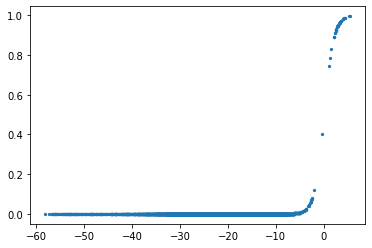

In [304]:
linear_fit2 = ( np.dot(X_test2, lr2.coef_.T).flatten() + lr2.intercept_ )

plt.scatter(linear_fit2, sigmoid(linear_fit2), s = 5)
plt.show()

In [305]:
print("Acurácia do modelo:", balanced_accuracy_score(y_test, lr.predict(X_test)))

Acurácia do modelo: 1.0


In [308]:
np.mean(lr.predict(X_test) == y_test)

1.0